In [412]:
include("../code/headers.jl")

In [334]:
H = [1 1 1 0 0; 1 0 0 0 0; 1 0 0 1 1]
m,n = size(H)

(3, 5)

In [417]:
n = 10
m = 4
maxiter=Int(1e3)
tol=1e-13
fg = ldpc_graphGF2(n,m)
# fg = FactorGraphGF2(H)
for f in 1:m
   fg.mfv[f] .= zeros(length(fg.mfv[f])) 
end
# s = [-1, 1, 1] #+ 1e-8*randn(n)
s = 10*rand((-1,1), n) + 1e-8*randn(n)
fg.fields .= copy(s)

10-element Array{Float64,1}:
 -10.000000003077451
 -10.000000003157483
  -9.99999999386421
  10.000000000648514
 -10.000000013152908
  10.000000015025512
  10.000000008500928
  -9.999999977897325
  -9.999999983117775
  -9.999999999419156

In [434]:
ϵ = 0.0
@showprogress for it in 1:maxiter
    ϵ = onebpiter!(fg, BP())
end
σ = sign.(fg.fields)
@assert all(σ .!= 0)
x = σ .== -1
nunsat = sum(fg.H*x .% 2)
@show nunsat, ϵ
d = mean(σ .!= sign.(s))

(nunsat, ϵ) = (4, 3.055333763768431e-13)


0.0

In [411]:
[fg.fields s x]

10×3 Array{Float64,2}:
  0.372788   10.0  0.0
 -0.952772  -10.0  1.0
 -0.612819  -10.0  1.0
  0.897192   10.0  0.0
 -0.372788  -10.0  1.0
 10.1617     10.0  0.0
 -9.91362   -10.0  1.0
 -0.50083   -10.0  1.0
 -0.897192  -10.0  1.0
 -0.10779   -10.0  1.0

In [435]:
fg.mfv

4-element Array{Array{Float64,1},1}:
 [-4.653426415589617, -4.653426416083988, 4.653426416493978, 4.653426416067479, 4.653426416040574]
 [4.653426403015383, 4.653426413026953, 4.653426407321648, 4.65342640779951, 4.653426407772912]
 [-4.653426399219388, 4.653426411595506, -4.653426405437409, 4.6534264049427305, 4.653426405847398]
 [-4.653426405588747, 4.653426417964865, 4.653426417017701, -4.653426411312702, 4.653426407006131]

In [346]:
fg.Fneigs

3-element Array{Array{Int64,1},1}:
 [1, 2, 3]
 [1]
 [1, 4, 5]

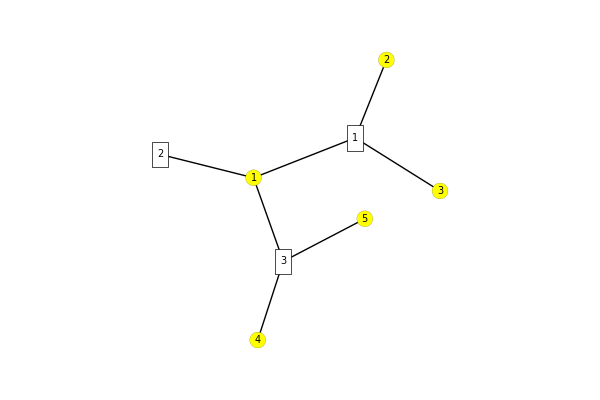

In [332]:
plot(fg)

In [247]:
fg.fields[fg.Fneigs[f]]

5-element Array{Float64,1}:
  0.531618194026121
  1.6550935799903705
  0.036791290977760634
 -0.6959769292066567
  0.5087942170448072

In [347]:
f = 1
t = Prod{Float64}()
for (i, v) in enumerate(fg.Fneigs[f])
    # Avoid Inf-Inf=NaN
    if fg.fields[v] == fg.mfv[f][i] 
        fg.fields[v] = 0.0
    else
        fg.fields[v] -= fg.mfv[f][i]
    end
    t *= tanh(fg.fields[v])
end
t

Prod{Float64}(-0.5800256583859739, 0, 0)

In [349]:
for (i, v) in enumerate(fg.Fneigs[f])
    m = atanh(t/tanh(fg.fields[v]))
#     isnan(m) && @show t,tanh(fg.fields[v])
    fg.mfv[f][i] = m
    # Update belief after updating the message
#     isnan(fg.fields[v]+m) && (@show f,v,fg.fields[v],m; error("NaN in field"))
    @show m
    fg.fields[v] += m
#     @show fg.fields[v]
end
fg.fields[fg.Fneigs[f]]

m = -0.6625013736789321
m = -0.9999999999999999
m = 0.9999999999999999


3-element Array{Float64,1}:
 Inf
  1.1102230246251565e-16
 -1.1102230246251565e-16

In [264]:
fg.fields - s

1000-element Array{Float64,1}:
 -0.002851854767093487
 -0.0002868738110324842
  0.0013751077544468249
  0.000993587511888494
 -0.00013769261479457118
  0.00018205186528406914
 -9.215044342875123e-5
 -4.566404482448522e-6
 -0.00024350232607828204
  0.00048746101605856573
 -6.512453355600467e-5
  0.00031542321663469153
 -1.5030788440562048e-6
  ⋮
  0.0006574269921940656
  0.005155526623879858
 -0.001655565830593897
  4.127608252846304e-5
 -1.1389068864442464e-5
 -0.0003991534297644317
 -0.0001367904170037626
  6.378814406721167e-5
  0.0002377188067429134
  0.00013051178386236373
  0.0011771391110437512
  0.00019644255086836981

In [197]:
fg.mfv

400-element Array{Array{Float64,1},1}:
 [8.679291836066606e-36, -1.3981647496035353e-37, -9.371623910495656e-35, -7.042967684311574e-37, -2.928891069057608e-36]
 [-2.8645412866120282e-33, 1.5512306651594406e-33, 1.832079818702644e-33, 5.870264179678719e-32, -3.743732527107919e-33]
 [3.0673065858763407e-34, -4.695092854207344e-34, 3.4210717888666774e-34, 8.784644562443347e-34, -3.3765610990853887e-34]
 [-8.691354630678946e-33, 5.132366761953097e-34, -2.99852181718419e-33, 1.20052750409494e-33, 1.5071531613208639e-33]
 [-4.855898662613959e-34, -6.2711781089633986e-34, 6.520146007914764e-34, 8.621055065206277e-34, 1.179323387697823e-33]
 [2.7263098784342006e-33, -3.36155169886522e-33, -2.409269547098881e-33, -5.6052403339833424e-33, -2.500835568554083e-33]
 [5.291799916785667e-35, -8.341770063927222e-35, 3.1773883482183516e-35, -3.710481606277312e-35, 2.861738668923873e-34]
 [5.880477031293699e-33, -3.217241829131818e-33, -2.7062269752794197e-32, -2.784829298923657e-33, -2.410489066432453

In [60]:
σ = sign.(fg.fields)
@assert all(σ .!= 0)
x = σ .== -1
nunsat = sum(fg.H*x .% 2)

0